In [43]:
import os
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [4]:
os.chdir("/Users/manoj/OneDrive/Documents/Manoj/Resume/Projects/Health Prediction Model")

In [5]:
df = pd.read_csv("Manoj Health.csv")

In [16]:
df['Time of Measurement'] = pd.to_datetime(df['Time of Measurement'])
df = df.sort_values('Time of Measurement')
df['Date'] = df['Time of Measurement'].dt.date
df.head()

,Time of Measurement,Weight(kg),BMI,Body Fat(%),Fat-Free Mass(kg),Subcutaneous Fat(%),Visceral Fat,Body Water(%),Skeletal Muscle(%),Muscle Mass(kg),...,Protein(%),BMR(kcal),Metabolic Age,Optimal weight(kg),Target to optimal weight(kg),Target to optimal fat mass(kg),Target to optimal muscle mass(kg),Body Type,Remarks,Date
0,2024-07-29 00:56:39,85.80,27.1,21.1,67.70,18.2,10.0,57.0,50.9,64.35,...,18.0,1816,28,NaN,NaN,NaN,NaN,NaN,NaN,2024-07-29
1,2024-07-29 00:56:55,85.80,27.4,21.5,67.35,18.5,10.0,56.7,50.6,64.01,...,17.9,1812,29,NaN,NaN,NaN,NaN,NaN,NaN,2024-07-29
2,2024-07-30 22:57:14,84.80,27.1,21.0,66.99,18.1,10.0,57.0,51.0,63.60,...,18.0,1833,28,NaN,NaN,NaN,NaN,NaN,NaN,2024-07-30
3,2024-07-30 22:57:42,84.80,27.1,21.0,66.99,18.1,10.0,57.0,51.0,63.60,...,18.0,1833,28,NaN,NaN,NaN,NaN,NaN,NaN,2024-07-30
4,2024-07-31 22:34:53,84.75,27.1,21.0,66.95,18.1,10.0,57.0,51.0,63.56,...,18.0,1833,28,NaN,NaN,NaN,NaN,NaN,NaN,2024-07-31


In [15]:
df.describe()

,Time of Measurement,Weight(kg),BMI,Body Fat(%),Fat-Free Mass(kg),Subcutaneous Fat(%),Visceral Fat,Body Water(%),Skeletal Muscle(%),Muscle Mass(kg),Bone Mass(kg),Protein(%),BMR(kcal),Metabolic Age,Optimal weight(kg),Target to optimal weight(kg),Target to optimal fat mass(kg),Target to optimal muscle mass(kg),Body Type,Remarks
count,113,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,2024-10-16 03:27:09.265486592,82.542920,26.218584,19.735398,66.242566,17.073451,9.079646,57.946903,51.776991,62.930265,3.312301,18.296460,1799.946903,27.389381,NaN,NaN,NaN,NaN,NaN,NaN
min,2024-07-29 00:56:39,80.200000,25.400000,18.400000,65.440000,16.000000,8.000000,56.700000,50.600000,62.150000,3.260000,17.900000,1777.000000,26.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,2024-08-16 07:30:25,81.550000,25.800000,19.100000,65.970000,16.500000,9.000000,57.500000,51.400000,62.670000,3.290000,18.200000,1790.000000,27.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,2024-10-26 17:13:40,82.450000,26.100000,19.600000,66.200000,17.000000,9.000000,58.000000,51.900000,62.890000,3.320000,18.300000,1803.000000,27.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2024-12-01 14:55:32,83.200000,26.600000,20.300000,66.430000,17.500000,9.000000,58.400000,52.200000,63.090000,3.330000,18.400000,1808.000000,28.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,2025-03-01 16:38:04,85.800000,27.400000,21.500000,67.700000,18.500000,10.000000,58.900000,52.700000,64.350000,3.390000,18.600000,1833.000000,29.000000,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1.250498,0.485789,0.742092,0.413191,0.613977,0.553263,0.534701,0.488257,0.396699,0.031311,0.173683,13.566530,0.618663,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df=df.drop(columns = ["Optimal weight(kg)","Target to optimal weight(kg)","Target to optimal fat mass(kg)","Target to optimal muscle mass(kg)","Body Type","Remarks"])

In [26]:
print(df.shape)

(113, 15)


In [27]:
print(df.isnull().sum())

Time of Measurement    0
Weight(kg)             0
BMI                    0
Body Fat(%)            0
Fat-Free Mass(kg)      0
Subcutaneous Fat(%)    0
Visceral Fat           0
Body Water(%)          0
Skeletal Muscle(%)     0
Muscle Mass(kg)        0
Bone Mass(kg)          0
Protein(%)             0
BMR(kcal)              0
Metabolic Age          0
Date                   0
dtype: int64


In [28]:
print(df.dtypes)

Time of Measurement    datetime64[ns]
Weight(kg)                    float64
BMI                           float64
Body Fat(%)                   float64
Fat-Free Mass(kg)             float64
Subcutaneous Fat(%)           float64
Visceral Fat                  float64
Body Water(%)                 float64
Skeletal Muscle(%)            float64
Muscle Mass(kg)               float64
Bone Mass(kg)                 float64
Protein(%)                    float64
BMR(kcal)                       int64
Metabolic Age                   int64
Date                           object
dtype: object


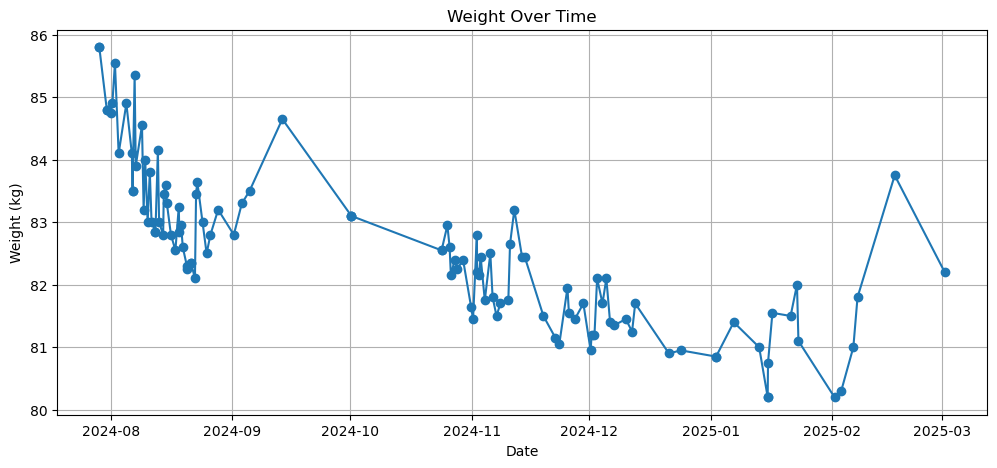

In [29]:
plt.figure(figsize=(12, 5))
plt.plot(df['Time of Measurement'], df['Weight(kg)'], marker='o')
plt.title('Weight Over Time')
plt.xlabel('Date')
plt.ylabel('Weight (kg)')
plt.grid(True)
plt.show()


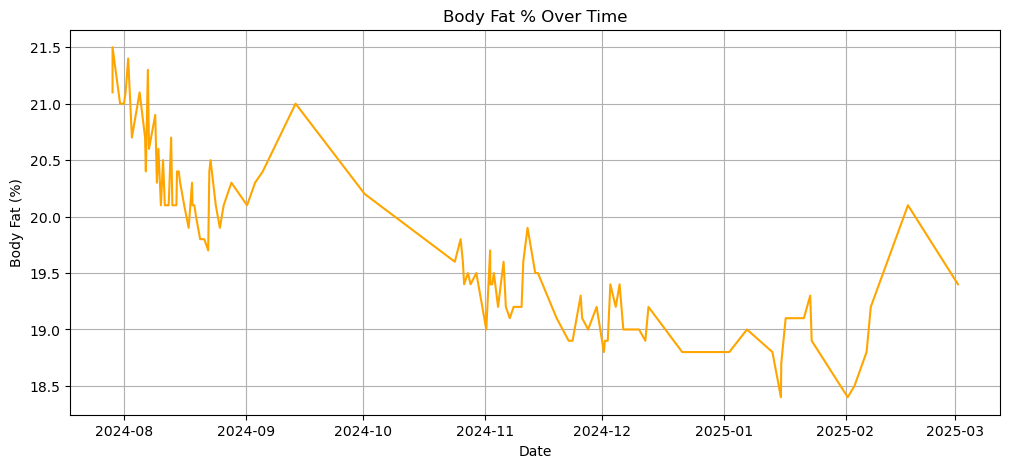

In [30]:
plt.figure(figsize=(12, 5))
plt.plot(df['Time of Measurement'], df['Body Fat(%)'], color='orange')
plt.title('Body Fat % Over Time')
plt.xlabel('Date')
plt.ylabel('Body Fat (%)')
plt.grid(True)
plt.show()


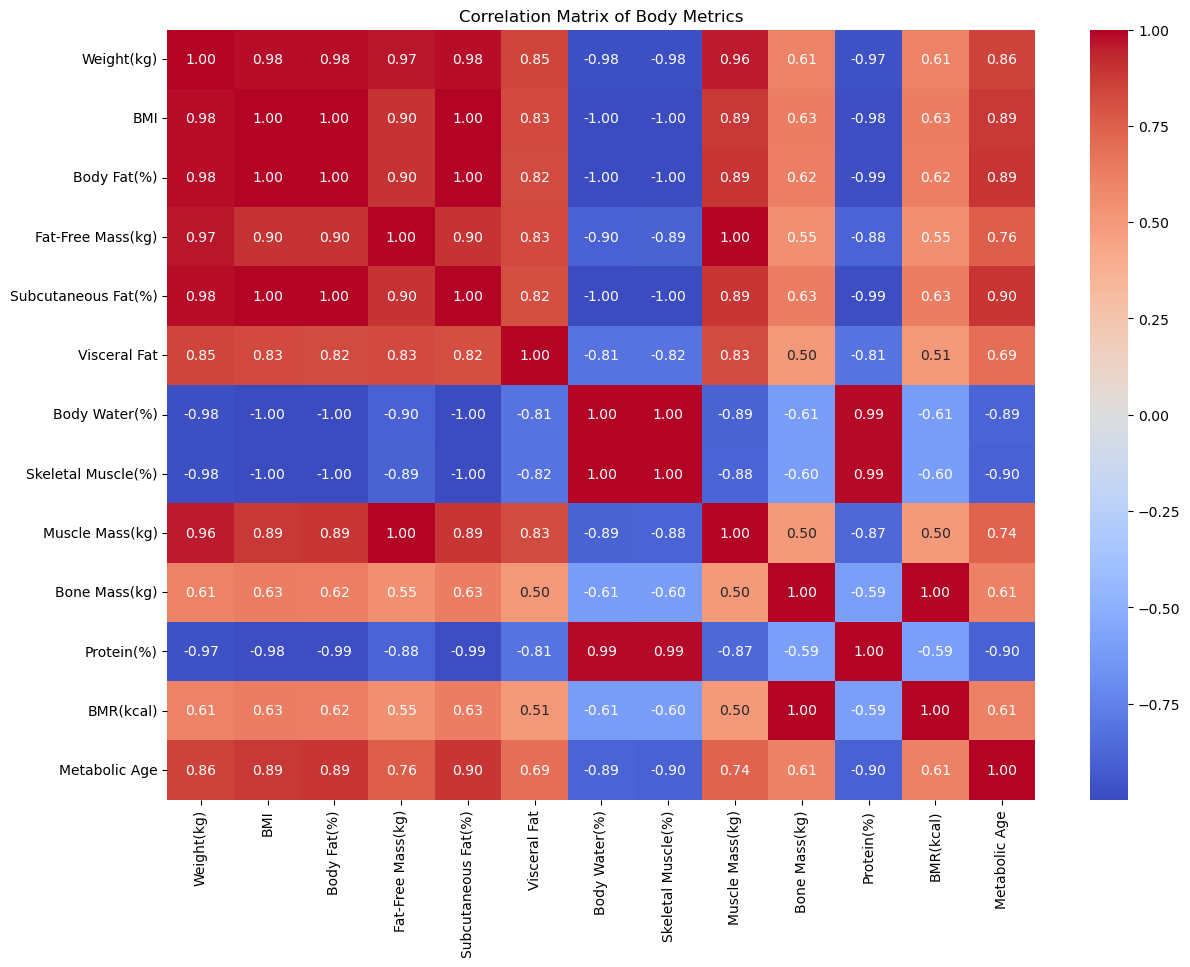

In [31]:
numeric_cols = df.select_dtypes(include='number')
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Body Metrics")
plt.show()


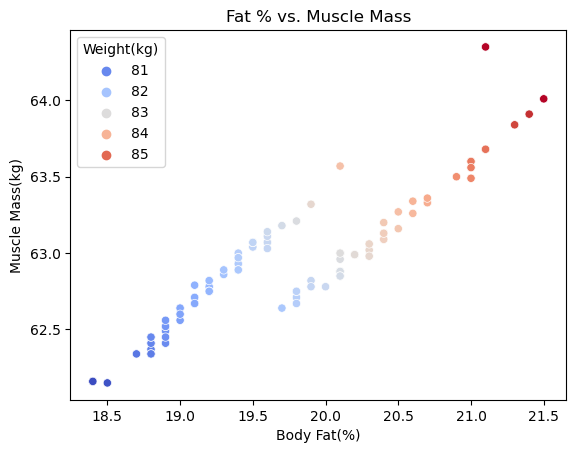

In [32]:
sns.scatterplot(data=df, x='Body Fat(%)', y='Muscle Mass(kg)', hue='Weight(kg)', palette='coolwarm')
plt.title("Fat % vs. Muscle Mass")
plt.show()

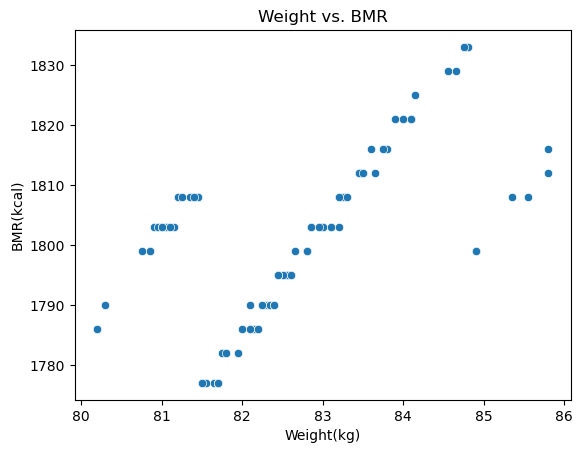

In [33]:
sns.scatterplot(data=df, x='Weight(kg)', y='BMR(kcal)')
plt.title("Weight vs. BMR")
plt.show()

In [34]:
#Feature Engineering
# Generate rolling averages (7-day)
df['Weight_7D_avg'] = df['Weight(kg)'].rolling(7).mean()
df['Fat_7D_avg'] = df['Body Fat(%)'].rolling(7).mean()
df['Muscle_7D_avg'] = df['Muscle Mass(kg)'].rolling(7).mean()

# Lag features (previous day’s value)
df['Fat_lag1'] = df['Body Fat(%)'].shift(1)
df['Muscle_lag1'] = df['Muscle Mass(kg)'].shift(1)


In [38]:
# Target: body fat % and muscle mass 1 day ahead
df['Fat_target'] = df['Body Fat(%)'].shift(-1)
df['Muscle_target'] = df['Muscle Mass(kg)'].shift(-1)

features = ['Weight(kg)', 'BMI', 'BMR(kcal)', 'Fat-Free Mass(kg)',
            'Protein(%)', 'Metabolic Age', 'Body Water(%)',
            'Weight_7D_avg', 'Fat_7D_avg', 'Fat_lag1']

df_model = df[features + ['Fat_target']].dropna()


In [39]:
# Split features and target
X = df_model[features]
y_fat = df_model['Fat_target']

In [40]:

X_train, X_test, y_train, y_test = train_test_split(X, y_fat, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
preds = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, preds))

MAE: 0.2819545454545446


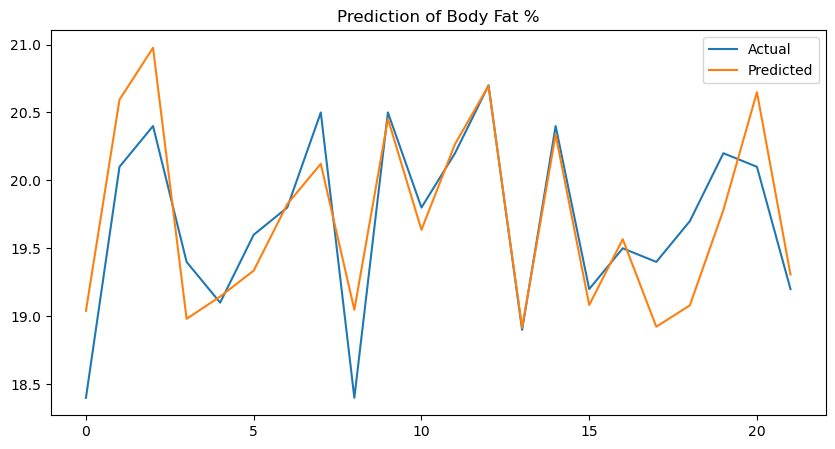

In [41]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual")
plt.plot(preds, label="Predicted")
plt.title("Prediction of Body Fat %")
plt.legend()
plt.show()


In [42]:
importances = model.feature_importances_
for feat, score in sorted(zip(features, importances), key=lambda x: -x[1]):
    print(f"{feat}: {score:.4f}")


Fat_7D_avg: 0.3307
BMI: 0.2400
Fat_lag1: 0.1732
Body Water(%): 0.0743
Weight(kg): 0.0624
Weight_7D_avg: 0.0598
Fat-Free Mass(kg): 0.0322
Protein(%): 0.0191
BMR(kcal): 0.0077
Metabolic Age: 0.0007


In [44]:
joblib.dump(model, 'body_fat_predictor.pkl')

['body_fat_predictor.pkl']

In [45]:
features = ['Weight(kg)', 'BMI', 'BMR(kcal)', 'Fat-Free Mass(kg)',
            'Protein(%)', 'Metabolic Age', 'Body Water(%)',
            'Weight_7D_avg', 'Fat_7D_avg', 'Fat_lag1']

joblib.dump(features, 'model_features.pkl')

['model_features.pkl']